# Takeaways from that dude's research (3 articles)

1. Spatial clustering and centroid clustering are broken, relies on picker to self optimise within that coordinate, so doesn't help in complying to protocol strictly

2. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import random as rand
from collections import Counter
import itertools
from ast import literal_eval
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_lines.csv')   #df_lines

In [3]:
df.head(20)

,Unnamed: 0,S/N,DATE,OrderNumber,SKU,PCS,ReferenceID,Location,Alley_Number,Cellule,Coord,AlleyCell,Size
0,0,0,12/11/2018,3780678,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119,"(330, 120)"
1,1,1,12/11/2018,3780650,340308,1,340308,A0721204,A07,21,"[32.5, 22.5]",A0721,"(350, 200)"
2,2,2,12/11/2018,3780649,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119,"(330, 120)"
3,3,3,12/11/2018,3780645,442025,1,442025,A0706401,A07,6,"[31.25, 10.5]",A0706,"(210, 260)"
4,4,4,12/11/2018,3780638,436455,1,436455,A0216107,A02,16,"[47.5, 18.0]",A0216,"(350, 240)"
5,5,5,12/11/2018,3780641,403849,1,403849,A0308201,A03,8,"[44.25, 12.0]",A0308,"(260, 360)"
6,6,6,12/11/2018,3780633,439405,1,439405,A0403203,A04,3,"[42.25, 9.0]",A0403,"(150, 120)"
7,7,7,12/11/2018,3780621,419207,2,419207,A0503203,A05,3,"[39.0, 9.0]",A0503,"(170, 160)"
8,8,8,12/11/2018,3780621,447663,1,447663,A1020501,A10,20,"[20.75, 21.0]",A1020,"(100, 140)"
9,9,9,12/11/2018,3780618,364507,1,364507,A0306503,A03,6,"[44.25, 10.5]",A0306,"(50, 180)"


In [12]:

df.describe(include="all")

,Unnamed: 0,S/N,DATE,OrderNumber,SKU,PCS,ReferenceID,Location,Alley_Number,Cellule,Coord,AlleyCell,Size
count,5000.000000,5000.000000,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000,5000,5000
unique,NaN,NaN,16,NaN,NaN,NaN,NaN,1050,11,NaN,205,205,580
top,NaN,NaN,12/4/2018,NaN,NaN,NaN,NaN,A1119504,A10,NaN,"[19.5, 21.0]",A1119,"(330, 120)"
freq,NaN,NaN,536,NaN,NaN,NaN,NaN,430,1231,NaN,433,433,455
mean,2499.500000,2499.500000,NaN,3.775473e+06,378828.094400,1.085000,378828.094400,NaN,NaN,11.065800,NaN,NaN,NaN
std,1443.520003,1443.520003,NaN,1.782518e+04,70197.216849,0.707018,70197.216849,NaN,NaN,6.268503,NaN,NaN,NaN
min,0.000000,0.000000,NaN,3.752213e+06,17769.000000,1.000000,17769.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,1249.750000,1249.750000,NaN,3.759652e+06,345960.000000,1.000000,345960.000000,NaN,NaN,6.000000,NaN,NaN,NaN
50%,2499.500000,2499.500000,NaN,3.770972e+06,399573.000000,1.000000,399573.000000,NaN,NaN,10.000000,NaN,NaN,NaN
75%,3749.250000,3749.250000,NaN,3.785234e+06,440471.000000,1.000000,440471.000000,NaN,NaN,18.000000,NaN,NaN,NaN


In [4]:
def get_unique_count(col_name):
    return len(df[col_name].unique())

In [5]:
# Num of unique orders
get_unique_count('OrderNumber')

3584

In [6]:
# Num of unique Dates
get_unique_count('DATE')

16

## Check if each order has unique SKUs

In [7]:
df[ordernum_col].value_counts()#.unique()
freqs = df[ordernum_col].value_counts()
num_orders_with_n_orderlines = Counter(freqs)
print(num_orders_with_n_orderlines)

NameError: name 'ordernum_col' is not defined

In [8]:

# Mapping Order lines
# df_nline = pd.DataFrame(df.groupby(['OrderNumber'])['SKU'].count())

unique_order_nums = df[ordernum_col].unique()
for uon in unique_order_nums:
    this_order = df[df[ordernum_col] == uon]
    print(len(this_order['SKU'].unique()))
    print(len(this_order['SKU'].index))
    
    print("=" * 100)

NameError: name 'ordernum_col' is not defined

## Let's assume we this whole list is for one day

## Let DATE just be the date order is confirmed, and create another column TIME_TO_PICK be the latest time to pick finish.

In [9]:
def get_rand(this_range):
    return rand.randint(this_range[0], this_range[1])

In [10]:
pick_time_col = "TIME_TO_PICK"
ordernum_col = "OrderNumber"
seed = 1234
hour_range = (8,18)
min_range = (0,59)
ordernum_to_picktime = {}

rand.seed(seed)

for x in df[ordernum_col].unique():
    rand_hour = get_rand(hour_range)
    rand_min = get_rand(min_range)
    ordernum_to_picktime[x] = dt.time(rand_hour, rand_min)

In [11]:
def get_pick_time(x):
    return ordernum_to_picktime[x[ordernum_col]]

df[pick_time_col] = df.apply(get_pick_time,axis=1)

In [12]:
df.head()

,Unnamed: 0,S/N,DATE,OrderNumber,SKU,PCS,ReferenceID,Location,Alley_Number,Cellule,Coord,AlleyCell,Size,TIME_TO_PICK
0,0,0,12/11/2018,3780678,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119,"(330, 120)",15:07:00
1,1,1,12/11/2018,3780650,340308,1,340308,A0721204,A07,21,"[32.5, 22.5]",A0721,"(350, 200)",08:05:00
2,2,2,12/11/2018,3780649,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119,"(330, 120)",17:02:00
3,3,3,12/11/2018,3780645,442025,1,442025,A0706401,A07,6,"[31.25, 10.5]",A0706,"(210, 260)",18:44:00
4,4,4,12/11/2018,3780638,436455,1,436455,A0216107,A02,16,"[47.5, 18.0]",A0216,"(350, 240)",09:06:00


# Create occupancy grid

# #######

In [13]:
# Mapping Order lines
df_nline = pd.DataFrame(df.groupby(['OrderNumber'])['SKU'].count())



In [14]:

def process_lines(df_orderlines):
    ''' Processing of dataframe '''
    # Mapping Order lines
    df_nline = pd.DataFrame(df_orderlines.groupby(['OrderNumber'])['SKU'].count())

    # Lists
    list_ord = list(df_nline.index.astype(int).values)
    list_lines = list(df_nline['SKU'].values.astype(int))

    # Mapping
    dict_nline = dict(zip(list_ord, list_lines))
    df_orderlines['N_lines'] = df_orderlines['OrderNumber'].map(dict_nline)

    # Processing
    df_mono, df_multi = df_orderlines[df_orderlines['N_lines'] == 1], df_orderlines[df_orderlines['N_lines'] > 1]
    del df_orderlines

    return df_mono, df_multi

mono, multi = process_lines(df)

In [15]:
def orderlines_mapping(df_orderlines, orders_number):
	'''Mapping orders with wave number'''
	df_orderlines.sort_values(by='DATE', ascending = True, inplace = True)
	# Unique order numbers list
	list_orders = df_orderlines.OrderNumber.unique()
	dict_map = dict(zip(list_orders, [i for i in range(1, len(list_orders))]))
	# Order ID mapping
	df_orderlines['OrderID'] = df_orderlines['OrderNumber'].map(dict_map)
	# Grouping Orders by Wave of orders_number 
	df_orderlines['WaveID'] = (df_orderlines.OrderID%orders_number == 0).shift(1).fillna(0).cumsum()
	# Counting number of Waves
	waves_number = df_orderlines.WaveID.max() + 1
	return df_orderlines, waves_number

In [16]:
lines, wave_num = orderlines_mapping(df, 3)

In [17]:
(lines.OrderID%4 == 0).shift(1).fillna(0)#.cumsum()

4803        0
4702    False
4701    False
4700    False
4699     True
        ...  
1122    False
1123    False
1124    False
1126    False
3614     True
Name: OrderID, Length: 5000, dtype: object

In [18]:
list_locs = list(df['Coord'].apply(lambda t: literal_eval(t)).values)
list_locs.sort()
# List of unique coordinates
[print(k) for k,_ in itertools.groupby(list_locs)]
# list_locs = list(k for k,_ in itertools.groupby(list_locs))

[15.25, 6.0]
[15.25, 9.0]
[15.25, 10.5]
[15.25, 12.0]
[15.25, 21.0]
[19.5, 6.0]
[19.5, 9.0]
[19.5, 10.5]
[19.5, 12.0]
[19.5, 13.5]
[19.5, 15.0]
[19.5, 16.5]
[19.5, 18.0]
[19.5, 19.5]
[19.5, 21.0]
[20.75, 6.0]
[20.75, 9.0]
[20.75, 10.5]
[20.75, 12.0]
[20.75, 13.5]
[20.75, 15.0]
[20.75, 16.5]
[20.75, 18.0]
[20.75, 19.5]
[20.75, 21.0]
[20.75, 22.5]
[22.75, 6.0]
[22.75, 9.0]
[22.75, 10.5]
[22.75, 12.0]
[22.75, 13.5]
[22.75, 15.0]
[22.75, 16.5]
[22.75, 18.0]
[22.75, 19.5]
[22.75, 21.0]
[22.75, 22.5]
[24, 6.0]
[24, 9.0]
[24, 10.5]
[24, 12.0]
[24, 13.5]
[24, 15.0]
[24, 16.5]
[24, 18.0]
[24, 19.5]
[24, 21.0]
[24, 22.5]
[26, 6.0]
[26, 9.0]
[26, 10.5]
[26, 12.0]
[26, 13.5]
[26, 15.0]
[26, 16.5]
[26, 18.0]
[26, 19.5]
[26, 21.0]
[26, 22.5]
[28.0, 6.0]
[28.0, 9.0]
[28.0, 10.5]
[28.0, 12.0]
[28.0, 13.5]
[28.0, 15.0]
[28.0, 16.5]
[28.0, 18.0]
[28.0, 21.0]
[28.0, 22.5]
[29.25, 6.0]
[29.25, 9.0]
[29.25, 10.5]
[29.25, 12.0]
[29.25, 13.5]
[29.25, 18.0]
[31.25, 6.0]
[31.25, 9.0]
[31.25, 10.5]
[31.25, 12.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [19]:
list_locs

[[15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 6.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 9.0],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5],
 [15.25, 10.5

In [20]:
# Alley Coordinates on y-axis
y_low, y_high = 5.5, 50
# Origin Location
origin_loc = [0, y_low]
df_waves, df_results = simulate_batch(1, 10, y_low, y_high, origin_loc, 1000, df) #num_orders

NameError: name 'simulate_batch' is not defined

In [21]:
test = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})

test.groupby(['Animal'])\


SyntaxError: unexpected EOF while parsing (1294718826.py, line 5)

## Methodology of experimentation
1. Shuffle the locations of SKUs as it may be skewed to SKUs too near or too far from the starting point. Alternatively, swap the starting point from bottom left to top right.

2. 

## Group orders by First Come First serve 

## Constraints
1. Whole number of invoice

## Assumptions
1. N = 10, should it even be necessary? 
2. I can sort the DATE field, which is when the order that must be fulfilled by 


In [22]:
N = 10
pallet_size = {
    "w": 100,
    "l": 120
}
def dict2df(cur_dict,cols):
    cur_df = pd.DataFrame(columns = cols)
    for k,v in cur_dict.items():
        cur_df = pd.concat([cur_df,v])
    return cur_df
def sortOrdersFCFS(df):
    col = 'OrderNumber'
    unique_orders = df[col].unique()
    print(unique_orders)
    order_num_to_lines = {}
    for uon in unique_orders:
        order_num_to_lines[uon] = df[df[col] == uon]
#     print(order_num_to_lines)
    
    return dict2df(order_num_to_lines, df.columns), order_num_to_lines#pd.DataFrame.from_dict(order_num_to_lines,orient='index')

def total_area_lines(lines):
    total_area = 0
#     print(lines)
#     print(type(lines))
    for idx, line in lines.iterrows():
#         print(line)
        w = line["Size"][0] / 10
        l = line["Size"][1] / 10
        qty = line["PCS"]
        area = w * l * qty
        total_area += area
    return total_area

def batch_FCFS(otld,n_max = 100):#otld df
    """returns a list of batches, each batch is a list of order numbers"""
    on_col = 'OrderNumber'
    unique_orders = df[on_col].unique()
#     batch_id = 0
    batch_list = []
    cur_batch = [] # order numbers only
    cur_size = 0
    max_size = pallet_size["w"] * pallet_size["l"]
    for uon in unique_orders:
        lines = otld[uon] #df[df[on_col] == uon]
        order_area = total_area_lines(lines)
#         print(f'order_area: {order_area}')
        if (cur_size + order_area) > max_size or len(cur_batch) >= n_max:
            # Num of orders in batch
            print(len(cur_batch))
            batch_list.append(cur_batch)
            cur_size = 0
            cur_batch = []
            continue
        cur_batch.append(uon)
        cur_size += order_area
    
    # NUM OF BATCHES
    print(len(batch_list))
    return batch_list

def batch_SINGLE_ORDER():
    on_col = 'OrderNumber'
    unique_orders = df[on_col].unique()
    return [[x] for x in unique_orders]

def coords_str_to_list(df, col):
    return list(df[col].apply(lambda t: literal_eval(t)).values)

def gen_SKU_dict(df):
#     df['SKU']
    sku_dict = {}
    for idx, row in df.iterrows():
        this_SKU = row['SKU']
        sku_dict[this_SKU] = row[['Size','Coord','AlleyCell','Alley_Number','Location']]
    return sku_dict


In [23]:
df['Coord'] = coords_str_to_list(df,'Coord')
df['Size'] = coords_str_to_list(df,'Size')

In [24]:
sorted_df = df.sort_values(by='DATE')

In [25]:
order_sorted_df,order_to_lines_dict = sortOrdersFCFS(sorted_df)

[3752394 3752964 3753076 ... 3774037 3774016 3774011]


In [32]:
# batch_list = batch_FCFS(order_to_lines_dict,100)
batch_list = batch_SINGLE_ORDER()

In [27]:
# sorted_sku_df = df.sort_values(by='SKU')
sku_dict = gen_SKU_dict(sorted_df)  #sku_dict[230976]

In [30]:
y_low, y_high = 5.5, 50
def get_walk_dist(p1,p2):
    """Cur assumption, floorplan is a simple layout of rows"""
    # Start Point
    x1, y1 = p1[0], p1[1]
    # End Point
    x2, y2 = p2[0], p2[1]
    # Distance x-axis
    distance_x = abs(x2 - x1)
    # Distance y-axis
    movementCoords = [[x1,y1]]
    
    if x1 == x2:
        distance_y1 = abs(y2 - y1)
        distance_y2 = distance_y1
    else:
        distance_y1 = y_high - y1 + y_high - y2
        distance_y2 = (y1 - y_low) + (y2 - y_low)
        if distance_y1 <= distance_y2:
            movementCoords.append([x1,y_high])
            movementCoords.append([x2,y_high])
        else:
            movementCoords.append([x1,y_low])
            movementCoords.append([x2,y_low])
    
    movementCoords.append([x2,y2])
    
    # Minimum distance on y-axis 
    distance_y = min(distance_y1, distance_y2)
    # Total distance
    distance = distance_x + distance_y
    return (movementCoords, int(distance))
def zig_zag_routing(list_locs, cur_pos):
    """Just returns the distance following zig zag and coords to achieve distance"""
    
    total_dist = 0
    routeCoords = []
    for loc in list_locs:
        temp = get_walk_dist(cur_pos, loc)
        routeCoords.extend(temp[0])
        total_dist += temp[1]
        cur_pos = loc
    return (routeCoords, total_dist)

# def zig_zag_routing_w_sku(sku_df, cur_pos):
#     """Returns total zig zag distance + walking distance per SKU"""
    
#     total_dist = 0
#     for loc in list_locs:
#         total_dist += get_walk_dist(cur_pos, loc)
#         cur_pos = loc
#     return total_dist


def sort_locations(list_locs):
    return sorted(list_locs)

def sort_loc_df(sku_df):
#     print(sku_df.head())
#     print(sku_df['Coord'])
    return sku_df.sort_values(by="Coord")

#sku 2 dist

def get_sku_piece_counts(otld):
    on_col = 'OrderNumber'
    unique_orders = df[on_col].unique()
    sku_pieces = {}
    for uon in unique_orders:
        for idx, row in otld[uon].iterrows():
            cur_sku = row['SKU']
            if cur_sku in sku_pieces:
                sku_pieces[cur_sku] += row["PCS"]
            else:
                sku_pieces[cur_sku] = row["PCS"]
    return sku_pieces

def get_total_walking_dist(batch_list,otld,sku_dict): #batch
    cur_positions = [[0, 5.5], [100, y_high]]
    total_dists = []
    batch_dists = []
    batch_routes = []
    count = 0
    for cur_pos in cur_positions:
        total_dist = 0
        for batch in batch_list:
            list_locs = []
            skus = set()
            for order_num in batch:
                for idx, line in otld[order_num].iterrows():
                    skus.add(line['SKU'])
            for sku in skus:
                list_locs.append(sku_dict[sku]['Coord'])
            sorted_list_locs = sort_locations(list_locs)
            if (count == 3):
                f = open("listlocs.txt", "w")
                for elem in sorted_list_locs:
                    f.write(f"{elem[0]},{elem[1]}\n")
                f.close()
#             print(sorted_list_locs[:10])
            temp = zig_zag_routing(sorted_list_locs,cur_pos)
            batch_dist = temp[1]
            batch_coords = temp[0]
            
            batch_dists.append(batch_dist)
            batch_routes.append(batch_coords)
            total_dist += batch_dist
            count += 1
        print(f"total_dist: {total_dist}")
        print(batch_dists[-10:])
        total_dists.append(total_dist)
    return sum(total_dists) / len(total_dists), batch_dists, batch_routes

def get_walking_dist_per_sku(batch_list,otld,sku_dict): #batch
    cur_positions = [[5.5, y_low], [50, y_high]]
    total_dists = []
    batch_dists = []
    sku_dists = {}
    for cur_pos in cur_positions:
        total_dist = 0
        for batch in batch_list:
            list_locs = []
            sku_df = pd.DataFrame()
            skus = set()
            for order_num in batch:
                for idx, line in otld[order_num].iterrows():
                    skus.add(line['SKU'])
            for sku in skus:
#                 sku_df = pd.concat([sku_df,sku_dict[sku]],axis=1)
                sku_df = sku_df.append(sku_dict[sku],ignore_index=True)
            sku_df = sort_loc_df(sku_df)
            batch_dist = zig_zag_routing(sku_df['Coord'],cur_pos)
            for sku in skus:
                if sku in sku_dists:
                    sku_dists[sku].append(batch_dist)
                else:
                    sku_dists[sku] = []
            batch_dists.append(batch_dist)
            total_dist += batch_dist
        total_dists.append(total_dist)
    return sum(total_dists) / len(total_dists), batch_dists, sku_dists

In [33]:
avg_total_dist, batch_dists, batch_routes = get_total_walking_dist(batch_list,order_to_lines_dict,sku_dict)
# print(batch_routes[0])
f = open("demofile3.txt", "w")
for elem in batch_routes[3]:
    f.write(f"{elem[0]},{elem[1]}\n")
f.close()


total_dist: 168681
[50, 43, 29, 43, 27, 45, 49, 52, 44, 53]
total_dist: 412429
[94, 101, 115, 101, 117, 114, 95, 92, 100, 91]


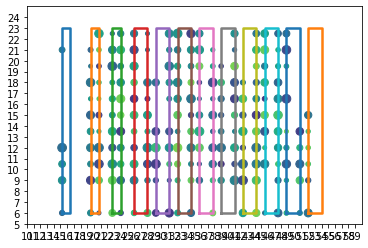

In [38]:
all_x = []
all_y = []
for k,_ in itertools.groupby(list_locs):
    # print(k)
    all_x.append(k[0])
    all_y.append(k[1])

fig, ax = plt.subplots()

for a,b in [(15.25,16.5), (19.5,20.75), (22.75,24), (26,28), (29.25, 31.25), (32.5,34.5),(35.75,37.75),(39.0,41.0),(42.25,44.25),(45.5,47.5),(48.75,50.75),(52.0,54.0)]:
    x = np.array([a,a,b,b,a])
    y = np.array([6.0,23.0,23.0,6.0,6.0])

    ax.step(x, y, linewidth=2.5)

x = np.array(all_x)
y = np.array(all_y)
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
ax.scatter(x,y,s=sizes, c=colors,vmin=0,vmax=100)


ax.set(xlim=(10, 60), xticks=np.arange(10, 60),
       ylim=(5, 25), yticks=np.arange(5, 25))

plt.show()

In [39]:
sku_pieces = get_sku_piece_counts(order_to_lines_dict)

In [40]:
avg_total_dist, batch_dists,sku_dist = get_walking_dist_per_sku(batch_list,order_to_lines_dict,sku_dict)

/tmp/ipykernel_21494/682525277.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sku_df = sku_df.append(sku_dict[sku],ignore_index=True)
/tmp/ipykernel_21494/682525277.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sku_df = sku_df.append(sku_dict[sku],ignore_index=True)
/tmp/ipykernel_21494/682525277.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sku_df = sku_df.append(sku_dict[sku],ignore_index=True)
/tmp/ipykernel_21494/682525277.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sku_df = sku_df.append(sku_dict[sku],ignore_index=True)
/tmp/ipykernel_21494/682525277.py:123: FutureWarning: The frame.append method is

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [ ]:
avg_total_dist

In [ ]:
dist_per_sku = {}
for k,v in sku_dist.items():
    dist_per_sku[k] = sum(v) / len(v)
    
# print(dist_per_sku)
max_sku,min_sku = max(dist_per_sku, key=dist_per_sku.get),min(dist_per_sku, key=dist_per_sku.get)
max_dist,min_dist = max(dist_per_sku.values()),min(dist_per_sku.values())
print(f"max_dist,min_dist: {max_dist},{min_dist}")

## Group order lines by 1 hour pick times, with N max order lines per group/so long as can fit on pallet

## Constraints
2. Size of SKU_size * pieces for each orderlines in the invoice(s) should fit on w * l pallet/trolley
3. A single route fulfils ALL orderlines within the group



### Current assumptions
1. User can pick unlimited pieces of each SKU in the group (i.e. no piece limit, all same size)
2. A warehouse workflow that orders are being delivered out throughout the day (e.g. certain ecommerce sub-operations)
3. Order fulilment times assumed the time to be delivered out so that drivers can successfully deliver goods on time




In [ ]:
N = 10


# Group orders by spatial closeness of majority of goods

## Constraints
1. A group consists of integer number of invoices
2. Size of SKU_size * pieces for each orderlines in the invoice(s) should fit on w * l pallet/trolley
3. A single route fulfils ALL orderlines within the invoice(s) in the group

## Assumption
1. A picking flow where everything is packed in the day, only to be delivered the following morning. Hence all invoices share the same "order fulfilment"

## Compare to
1. Group orders by First Come First Serve (i.e. batch orders based on as-is order in system)
2. 

# WHAT NOT TO DO
1. No condensing the closest point of centroid. It's fake haha

## Future considerations
2. Priority tags
3. Installments



In [ ]:
def filter_by_date(df,date):
    return df[df['DATE'] == date]


    

In [ ]:
def get_weighted_centroid(order_df):
    final_coord = [0,0]
    total_points = len(order_df.index)
    for idx, row in order_df.iterrows():
        x = row['Coord'][0]
        y = row['Coord'][1]
        final_coord[0] += x
        final_coord[1] += y
    final_coord[0] /= total_points
    final_coord[1] /= total_points
        
    return final_coord
on_col = 'OrderNumber'
unique_orders = df[on_col].unique()
order_to_centroid = {}
for uon in unique_orders:
    order_df = df[df[on_col] == uon]
    centroid_coord = get_weighted_centroid(order_df)
    order_to_centroid[uon] = centroid_coord


In [ ]:


def today_dict(overall_dict, orders):
    toRet = {}
    for order in orders:
        toRet[order] = overall_dict[order]
    return toRet

def batch_Spatial(otld, order_sequence,n_max = 100):#otld df
    """Makes use of a specific order sequence"""
    """returns a list of batches, each batch is a list of order numbers"""
    on_col = 'OrderNumber'
    batch_list = []
    cur_batch = [] # order numbers only
    cur_size = 0
    max_size = pallet_size["w"] * pallet_size["l"]
    for uon in order_sequence:
        lines = otld[uon] 
        order_area = total_area_lines(lines)
        if (cur_size + order_area) > max_size or len(cur_batch) >= n_max:
            # Num of orders in batch
            print(len(cur_batch))
            batch_list.append(cur_batch)
            cur_size = 0
            cur_batch = []
            continue
        cur_batch.append(uon)
        cur_size += order_area
    
    # NUM OF BATCHES
    print(len(batch_list))
    return batch_list 

In [ ]:
unique_dates = df['DATE'].unique()
batch_lists = []
for u_d in unique_dates:
    this_df = filter_by_date(df,u_d)
#     print(this_df.head(10))
    today_order_dict = today_dict(order_to_centroid, this_df[on_col].unique())
    today_order_dict = dict(sorted(today_order_dict.items(), key=lambda item: item[1]))
#     print(today_order_dict)
    batch_list = batch_Spatial(order_to_lines_dict,today_order_dict.keys())
    batch_lists.extend(batch_list)


In [ ]:
avg_total_dist, batch_dists,sku_dist = get_walking_dist_per_sku(batch_lists,order_to_lines_dict,sku_dict)

In [ ]:
dist_per_sku = {}
for k,v in sku_dist.items():
    dist_per_sku[k] = sum(v) / len(v)
    
# print(dist_per_sku)
max_sku,min_sku = max(dist_per_sku, key=dist_per_sku.get),min(dist_per_sku, key=dist_per_sku.get)
max_dist,min_dist = max(dist_per_sku.values()),min(dist_per_sku.values())
print(f"max_dist,min_dist: {max_dist},{min_dist}")
print(f"avg_total_dist: {avg_total_dist}")

# Group orderlines by spatial closeness of majority of goods

## Constraints
1. A single picker handles invoice(s) from start to finish, across 1 or more waves
2. A group can consists of fraction of invoice(s) so long as it can be fulfilled by the end of the day and the waves are handled by the same picker
3. Size of SKU_size * pieces for each orderlines in the invoice(s) should fit on w * l pallet/trolley

## Assumption
1. Pickers will have to stay throughout the entire shift, to completely fulfil their invoices for the day
2. Any weight can be handled by the pallet and the picker

## Compare to
1. Above method
2. Grouping by first come first serve
3. Baseline one by one order

## WHAT NOT TO DO
1. No condensing the closest point of centroid. It's fake haha

## Future considerations 
1. Priorities
2. Installments
3. 

# Routing

1. NCL
2. Google OR TOols  #https://developers.google.com/optimization/introduction/python
3. Zig zag, complete an aisle before proceeding to next aisle

# Links

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html


## What to do in the future?

1. Make a better map
2. Look into weight/difficulty of moving from one point to another